In [2]:
data = []

with open("g7.td", "r") as f:
    for line in f:
        if line.strip() == "#DATA":
            break
    for line in f:
        if line.strip():  # leere Zeilen ignorieren
            data.append([float(x) for x in line.split()])

# data ist jetzt eine Liste von Listen


In [3]:
import numpy as np

with open("g7.td") as f:
    for i, line in enumerate(f):
        if line.strip() == "#DATA":
            start = i + 1
            break

data = np.loadtxt("g7.td", skiprows=start)
print(data[:5])
print(data[-5:])

# time [s]
# Intensity Floureszenz

print(data.shape)


[[ 0.2      94.535   ]
 [ 0.4      94.264333]
 [ 0.6      94.262666]
 [ 0.8      94.379666]
 [ 1.       94.208666]]
[[5399.4       172.133   ]
 [5399.6       171.97    ]
 [5399.8       171.989   ]
 [5400.        172.068333]
 [5400.2       172.376   ]]
(27001, 2)


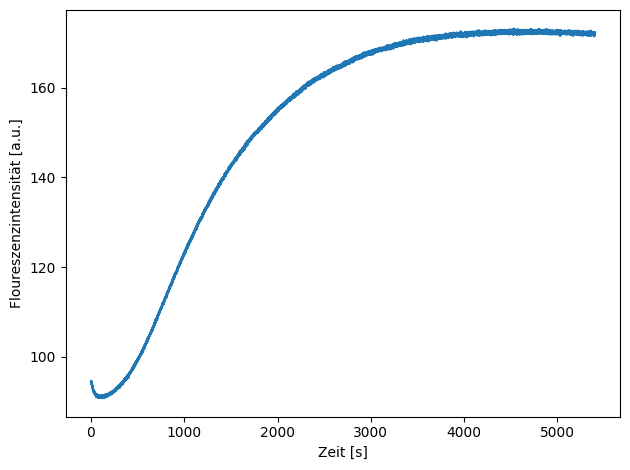

In [23]:
import matplotlib.pyplot as plt

x = data[:, 0]
y = data[:, 1]

plt.figure()
plt.plot(x, y)
plt.xlabel("Zeit [s]")
plt.ylabel("Floureszenzintensität [a.u.]")
plt.tight_layout()
plt.show()


In [5]:
# Noch Fitting?!



In [ ]:
!pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.3 MB 2.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.3 MB 2.7 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.3 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.3 MB 2.5 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.3 MB 2.4 MB/s eta 0:00:04
   ------------ --------------------------- 3.7/11.3 MB 2.4 MB/s eta 0:00:04
   --------------- ------------------------ 4.5/11.3 MB 2.6 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.3 MB 2.6 MB/s eta 0:00:03
   -------------------- ----------

In [ ]:

# Values checked

import pandas as pd

data_1 = {
    "time_min": [5, 10, 15, 20, 30, 40, 50, 60, 70],
    "t_B": [7.35, 42.38, 23.28, 23.27, 30.57, 28.85, 25.49, 29.1, 31.0],
    "winkel_deg": [30, 30, 45, 45, 60, 75, 75, 75, 75],
    "strecke_cm": [7, 1, 1, 1, 1.6, 1, 1, 1, 1]
}
if len(data_1["time_min"]) == len(data_1["t_B"]) == len(data_1["winkel_deg"]) == len(data_1["strecke_cm"]): 
    print("Data_1 fits")

df1 = pd.DataFrame(data_1)
data_2 = {
    "time_min": [5, 10, 15, 20, 35, 40, 50, 60, 70],
    "t_B": [2.6, 13, 40.7, 23.0, 150, 52, 83, 29.45, 61],
    "winkel_deg": [30, 30, 45, 45, 60, 75, 75, 75, 75],
    "strecke_cm": [7, 1, 1, 1, 1, 1, 1, 1, 1]
}

if len(data_2["time_min"]) == len(data_2["t_B"]) == len(data_2["winkel_deg"]) == len(data_2["strecke_cm"]): 
    print("Data_2 fits")

df2 = pd.DataFrame(data_2)

# Messung bei 60min - Expoentiell
data_3 = {
    "Konzentration": [1, 2.5, 4, 5],
    "t_B": [1.48, 4.98, 9.01, 29.1],
    "winkel_deg": [45, 45, 60, 75],
    "strecke_cm": [7, 7, 1, 1]
}

df3 = pd.DataFrame(data_3)

data_4 = {
    "Konzentration": [1, 2.5, 4, 5],
    "t_B": [1.26, 4.71, 11.68, 29.45],
    "winkel_deg": [45, 45, 60, 75],
    "strecke_cm": [7, 7, 1, 1]
}

df4 = pd.DataFrame(data_4)


Data_1 fits
Data_2 fits


In [16]:
# Für Kritische Konzentration
# Messung bei 60min - Expoentiell
data_3 = {
    "Konzentration": [1, 2.5, 4, 5],
    "t_B": [1.48, 4.98, 9.01, 29.1],
    "winkel_deg": [45, 45, 60, 75],
    "strecke_cm": [7, 7, 1, 1]
}

df3 = pd.DataFrame(data_3)

data_4 = {
    "Konzentration": [1, 2.5, 4, 5],
    "t_B": [1.26, 4.71, 11.68, 29.45],
    "winkel_deg": [45, 45, 60, 75],
    "strecke_cm": [7, 7, 1, 1]
}

df4 = pd.DataFrame(data_4)

In [ ]:
import math
# Durchmesser Kapillare
# Rechnung - Volumen = 100µl -> *10^-6 -> 100l -> *10^3 -> cm^3 
# Formel: V = π r^2 * h (G = Grundfläche Kreis und h = Höhe)
V = 100 # µl = 0.001 cm^3
V = V * 0.001 # cm^3
h = 9 # cm

r_kapillare_mm = math.sqrt(V/(np.pi * h))
print(f"Radius {r} cm")
        
d_kapillare_mm = r*2
print(f"Durchmesser {d_kapillare_mm} cm")


Radius 0.05947080387175904 cm
Durchmesser 0.11894160774351809 cm


In [ ]:

# d_kapillare Fehler??

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import 

# 